## **BlueBerries**

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [53]:
url='/content/drive/MyDrive/Prueba Python/WildBlueberryPollinationSimulationData.csv'
df=pd.read_csv(url,sep=',')
df.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [54]:
df.isnull().sum()

,0
Row#,0
clonesize,0
honeybee,0
bumbles,0
andrena,0
osmia,0
MaxOfUpperTRange,0
MinOfUpperTRange,0
AverageOfUpperTRange,0
MaxOfLowerTRange,0


In [55]:
df.isnull().sum().sum()

0

In [56]:
df.shape

(777, 18)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [58]:
num=df.select_dtypes(include=np.number).columns
num

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

## **1.	Análisis Exploratorio de Datos (EDA¨)**

In [59]:
num=['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield']

In [60]:
df[num].corr()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
clonesize,1.000000,0.119745,0.004807,-0.008451,-0.139049,0.034157,0.032854,0.033752,0.034295,0.033768,0.033566,-0.021696,-0.024455,-0.556591,-0.474038,-0.496156,-0.516737
honeybee,0.119745,1.000000,-0.233954,-0.125913,-0.189058,0.026359,0.025467,0.026365,0.026477,0.026104,0.025647,-0.073818,-0.093477,-0.009406,-0.166419,-0.170808,-0.044250
bumbles,0.004807,-0.233954,1.000000,0.010758,0.293665,-0.022863,-0.005801,-0.015821,-0.024662,-0.016801,-0.013985,0.058063,0.075376,0.289890,0.358202,0.380206,0.309407
andrena,-0.008451,-0.125913,0.010758,1.000000,0.387379,-0.026497,-0.023887,-0.025578,-0.026775,-0.025623,-0.025115,0.035297,0.043739,0.102549,0.092470,0.089178,0.140277
osmia,-0.139049,-0.189058,0.293665,0.387379,1.000000,-0.063755,-0.043237,-0.055441,-0.065910,-0.056546,-0.053141,0.083667,0.104188,0.334178,0.336136,0.353116,0.380892
MaxOfUpperTRange,0.034157,0.026359,-0.022863,-0.026497,-0.063755,1.000000,0.990961,0.998314,0.999900,0.998842,0.997658,-0.003286,-0.005677,-0.130450,0.058492,-0.034486,-0.187075
MinOfUpperTRange,0.032854,0.025467,-0.005801,-0.023887,-0.043237,0.990961,1.000000,0.997056,0.988988,0.996267,0.997798,-0.000798,-0.001889,-0.119856,0.067671,-0.024240,-0.175883
AverageOfUpperTRange,0.033752,0.026365,-0.015821,-0.025578,-0.055441,0.998314,0.997056,1.000000,0.997413,0.999944,0.999923,-0.002325,-0.004195,-0.125082,0.064034,-0.028925,-0.181774
MaxOfLowerTRange,0.034295,0.026477,-0.024662,-0.026775,-0.065910,0.999900,0.988988,0.997413,1.000000,0.998071,0.996609,-0.003558,-0.006087,-0.130693,0.058487,-0.034674,-0.187439
MinOfLowerTRange,0.033768,0.026104,-0.016801,-0.025623,-0.056546,0.998842,0.996267,0.999944,0.998071,1.000000,0.999787,-0.002403,-0.004334,-0.126788,0.062093,-0.030727,-0.183339


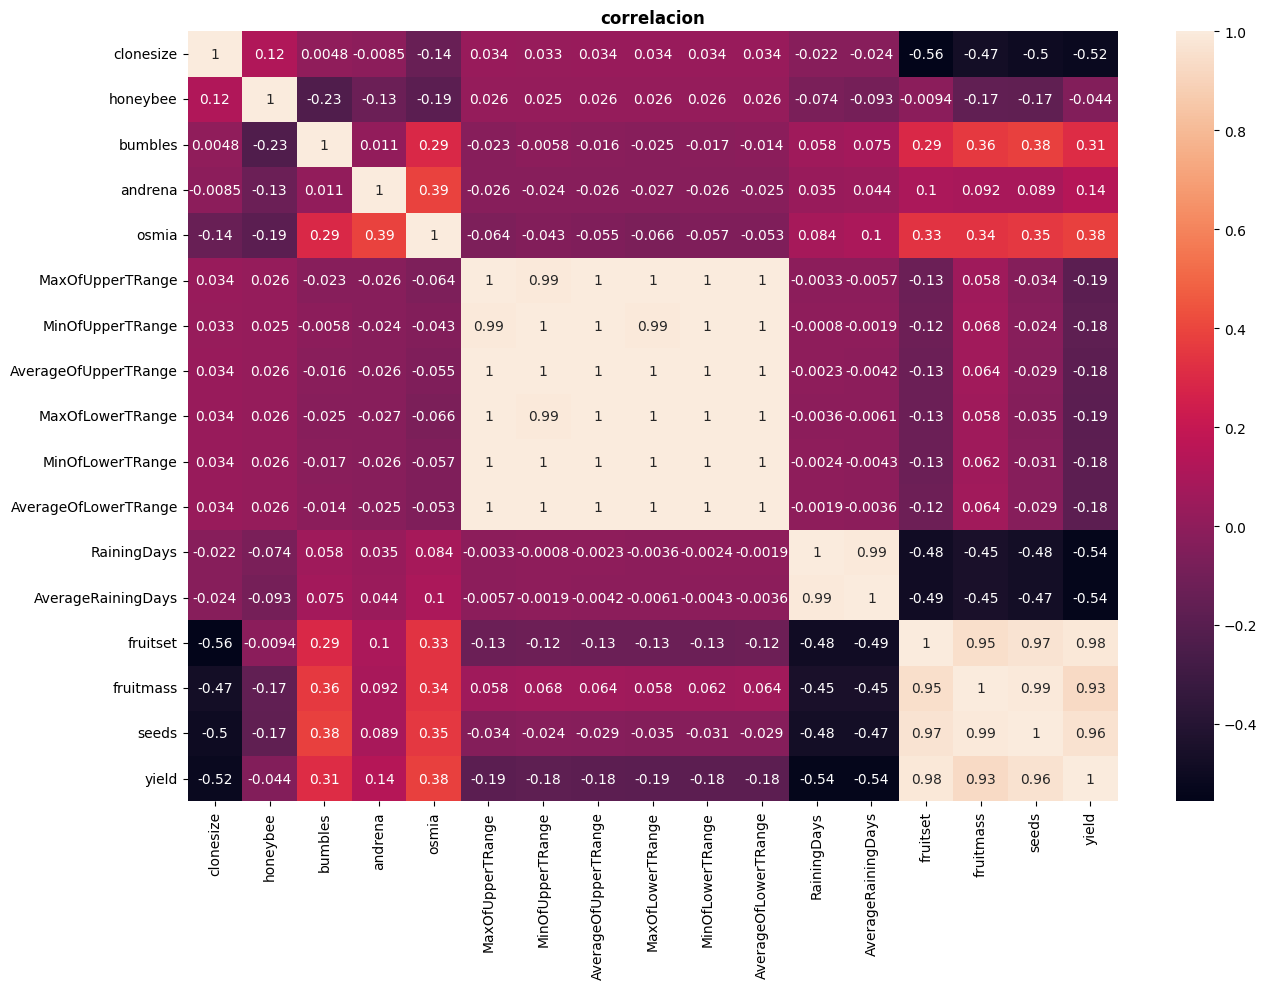

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(df[num].corr(),annot=True)
plt.title('correlacion',fontsize=12,weight='bold')
plt.show()

In [62]:
num_1=['fruitset', 'fruitmass', 'seeds',
       'yield']

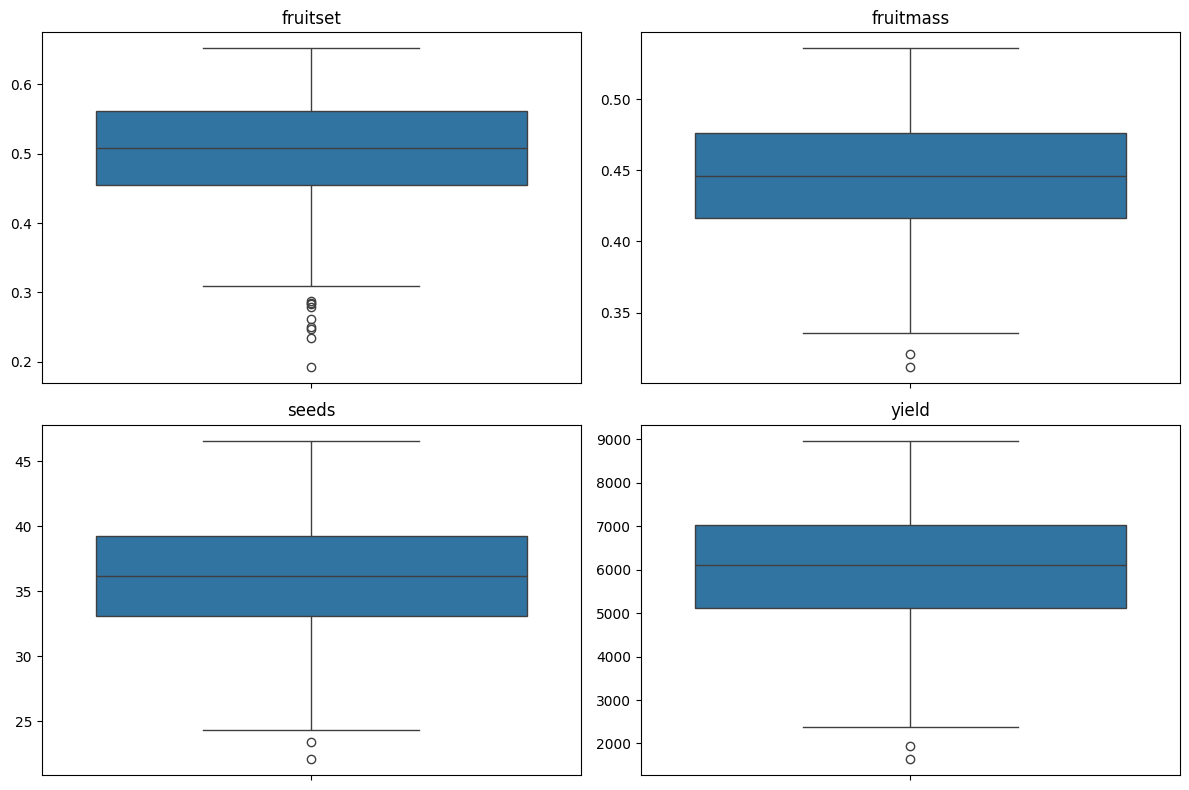

In [63]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, ax in zip(num_1, axs.flat):
    sns.boxplot(df[i], ax=ax)
    ax.set_title(i)
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

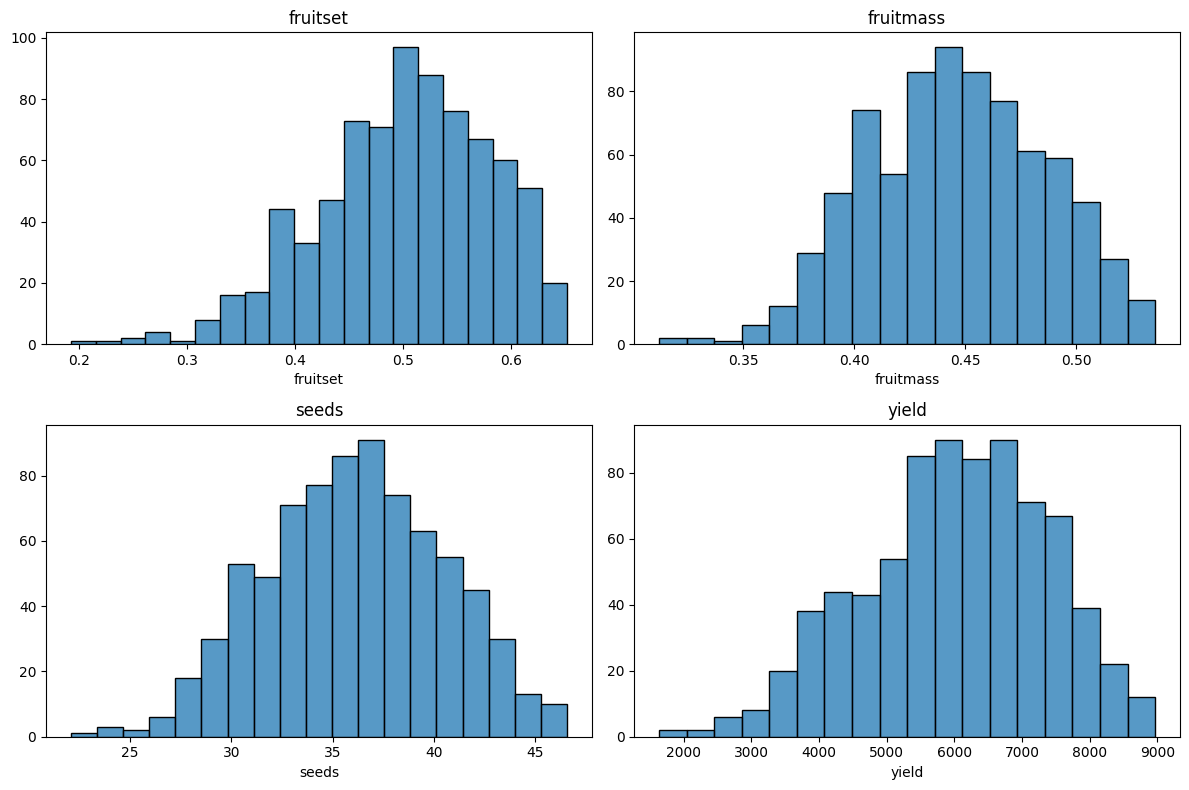

In [64]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, ax in zip(num_1, axs.flat):
    sns.histplot(df[i], ax=ax)
    ax.set_title(i)
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

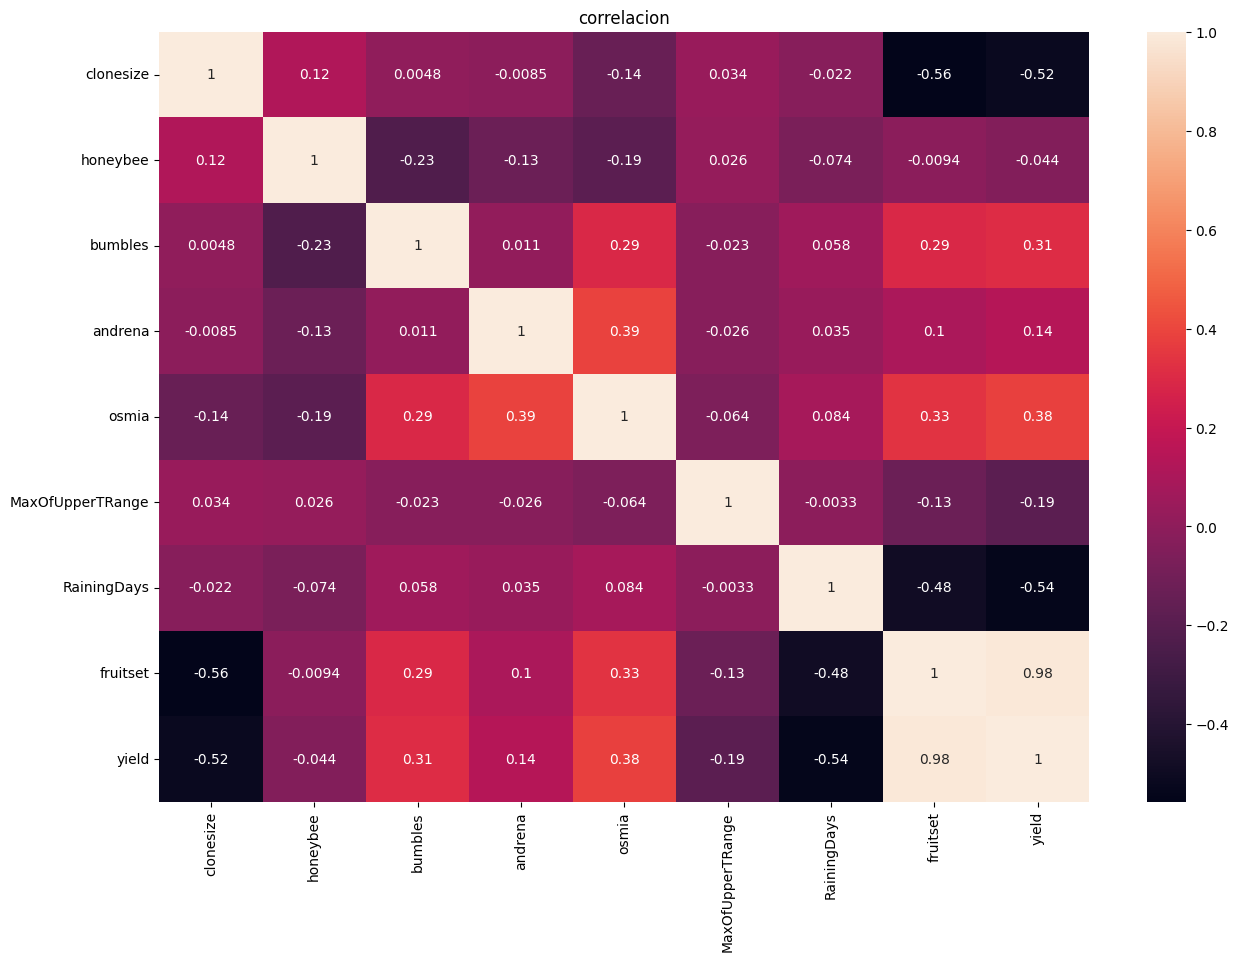

In [65]:
# elegir las mejores columnas
col=['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange',
       'RainingDays', 'fruitset',
       'yield']


plt.figure(figsize=(15,10))
sns.heatmap(df[col].corr(),annot=True)
plt.title('correlacion')
plt.show()


## **2. Preparación de los datos**

In [66]:
# eliminamos la columna row
df.drop('Row#', axis=1, inplace=True)
df.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [67]:
scaler=MinMaxScaler()
df[col]=scaler.fit_transform(df[col])
y=df['yield']
X=df.drop('yield',axis=1)

* **Backward Selección**

In [72]:
# Agregar una constante al modelo (intercepto)
X = sm.add_constant(df.drop('yield',axis=1))

# Función para realizar la selección hacia atrás
def backward_selection(X, y, significance_level=0.05):
    variables = list(X.columns)
    while len(variables) > 0:
        # Ajustar el modelo
        model = sm.OLS(y, X[variables]).fit()
        # Obtener el valor p más alto
        p_values = model.pvalues
        max_p_value = p_values.max()

        if max_p_value > significance_level:
            # Eliminar la variable con el valor p más alto
            excluded_variable = p_values.idxmax()
            variables.remove(excluded_variable)
            print(f"Eliminando {excluded_variable} con p-value {max_p_value:.4f}")
        else:
            break

    # Ajuste final del modelo
    final_model = sm.OLS(y, X[variables]).fit()
    return final_model, variables

# Realizar la selección hacia atrás
final_model, selected_columns = backward_selection(X, y)

# Mostrar el resumen del modelo final
print(final_model.summary())

# Mostrar las columnas seleccionadas
print("Columnas seleccionadas:", selected_columns)

Eliminando RainingDays con p-value 0.6167
Eliminando MaxOfUpperTRange con p-value 0.2645
Eliminando const con p-value 0.6577
Eliminando MinOfLowerTRange con p-value 0.4488
                                 OLS Regression Results                                
Dep. Variable:                  yield   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          8.170e+04
Date:                Sat, 05 Oct 2024   Prob (F-statistic):                        0.00
Time:                        04:17:30   Log-Likelihood:                          2074.9
No. Observations:                 777   AIC:                                     -4124.
Df Residuals:                     764   BIC:                                     -4063.
Df Model:                          13                                                  
Covariance Type:            nonrobus

Index(['const', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds'],
      dtype='object')

In [73]:
X=df[selected_columns]

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

## **3. Selección de Algoritmos**

### **MULTIPLE LINEAR REGRESSION**

In [76]:
model=LinearRegression()
# Ajusta el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [77]:
print('Mean Squared Error:', mse)
print('R-squared:', r2)
print('Mean Absolute Error:', mae)

Mean Squared Error: 0.00030887302821796896
R-squared: 0.9914576764493362
Mean Absolute Error: 0.01325604802010007


* **Hiperparametros**

In [78]:
# Definir hiperparámetros para ajustar
param_grid = {
    'alpha': [0.1, 0.5, 1, 5, 10]
}

# Crear modelo Ridge
model = Ridge()

# Crear objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Ajusta el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Realiza predicciones en los datos de prueba
y_pred = best_model.predict(X_test)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE en los datos de prueba: {mse}")
print(f"MAE en los datos de prueba: {mae}")
print(f"R² en los datos de prueba: {r2}")
print(f'Mejores hiperparámetros: {grid_search.best_params_}')

MSE en los datos de prueba: 0.0004083083271805503
MAE en los datos de prueba: 0.01482548016290322
R² en los datos de prueba: 0.9887076516219955
Mejores hiperparámetros: {'alpha': 0.5}


* **Validación Cruzada**

In [79]:
# Define la métrica de evaluación (MAE)
mae_scorer = make_scorer(mean_absolute_error)

# Realiza la validación cruzada con 5 folds
mae_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring=mae_scorer)

# Imprime las puntuaciones MAE de cada fold y el promedio
print(f"Puntuaciones MAE en cada fold: {-mae_scores}")
print(f"MAE promedio: {-mae_scores.mean()}")

# Opcional: Realiza la validación cruzada para MSE y R²
mse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"MSE promedio: {-mse_scores.mean()}")

r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"R² promedio: {r2_scores.mean()}")

Puntuaciones MAE en cada fold: [-0.01275456 -0.01586479 -0.01441363 -0.01447138 -0.01450383]
MAE promedio: -0.01440163807940198
MSE promedio: 0.00045546905282609274
R² promedio: 0.9861048362545143


### **RandomForestRegresor**

In [80]:
# Crea el modelo Random Forest con 100 árboles
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Ajusta el modelo a los datos de entrenamiento
modelo_rf.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred_rf = modelo_rf.predict(X_test)

# Evalúa el rendimiento del modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
print('Mean Squared Error:', mse_rf)
print('Mean Absolute Error:', mae_rf)
print('R-squared:', r2_rf)

Mean Squared Error: 0.00043945361630667065
Mean Absolute Error: 0.015878470819943438
R-squared: 0.9878462842882102


* **Hiperparametros**

In [81]:
# Definir hiperparámetros para ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

modelo_rf = RandomForestRegressor(random_state=42,criterion='squared_error')

# Crear objeto GridSearchCV
grid_search = GridSearchCV(estimator=modelo_rf, param_grid=param_grid, cv=5)

# Ajusta el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Realiza predicciones en los datos de prueba
y_pred = best_model.predict(X_test)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE en los datos de prueba: {mse}")
print(f"MAE en los datos de prueba: {mae}")
print(f"R² en los datos de prueba: {r2}")
print(f'Mejores hiperparámetros: {grid_search.best_params_}')

MSE en los datos de prueba: 0.00034647354479025363
MAE en los datos de prueba: 0.01437966884607381
R² en los datos de prueba: 0.9904177806057733
Mejores hiperparámetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


* **Validación Cruzada**

In [82]:
# Realiza la validación cruzada con 5 folds usando los datos escalados
mae_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Imprime las puntuaciones MAE de cada fold y el promedio
print(f"Puntuaciones MAE en cada fold: {-mae_scores}")
print(f"MAE promedio: {-mae_scores.mean()}")

# Opcional: Realiza la validación cruzada para MSE y R²
mse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"MSE promedio: {-mse_scores.mean()}")

r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"R² promedio: {r2_scores.mean()}")

# Ajusta el modelo a los datos escalados
model.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba escalados
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo en los datos de prueba
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"MSE en los datos de prueba: {mse}")
print(f"MAE en los datos de prueba: {mae}")
print(f"R² en los datos de prueba: {r2}")

Puntuaciones MAE en cada fold: [0.01527941 0.0138397  0.01896513 0.01569462 0.01611689]
MAE promedio: 0.015979149539250802
MSE promedio: 0.00045546905282609274
R² promedio: 0.9861048362545143
MSE en los datos de prueba: 0.0004579808123366784
MAE en los datos de prueba: 0.015389303745734946
R² en los datos de prueba: 0.987333888292069


## **6.	Conclusiones:**

* Segun los dos modelos obtenidos el mejor modelo segun el MAE es el randomForestRegression y con R2 de precisión de 0.987333888292069

